In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
lemmatize=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))


In [ ]:
def clean_social_media_text(text):
    text=re.sub(r'(.)\1{2,}',r'\1',text)
    text=re.sub(r'#\w+', '',text)
    text=re.sub(r'@\w+', '',text)
    text = re.sub(r'[\\/]', '', text)
    text = re.sub(r"[`']{2,}", '"', text)
    text = re.sub(r"\s+'s", "'s", text)
    text=re.sub(r'<.*?>', '',text)
    text=re.sub(r'https\S+|www\S+', '',text)
    emoji_re=re.compile('[r\U0001F600-\U0001F64F'
                        '\U0001F300-\U0001F5FF'
                        '\U0001F680-\U0001F6FF'
                        '\U00002500-\U00002BEF'
                        '\U00002700-\U000027BF'
                        '\U0001f926-\U0001f937'
                        '\U00010000-\U0010ffff]+',flags=re.UNICODE)
    text = emoji_re.sub(r'', text)
    text=re.sub(r'\s+',' ', text).strip()
    tokening=word_tokenize(text)
    processed=[lemmatize.lemmatize(token)
               for token in tokening if token.lower() not in stop_words]
    return ' '.join(processed)

print(" ")
df['cleaned_reviews'] = df['review'].apply(clean_social_media_text)
print(df[['review', 'cleaned_reviews']].head())

 
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                     cleaned_reviews  
0  One othe eviewes mentioned afte watching 1 Oz ...  
1  wondeful little poduction . filming technique ...  
2  thought wondeful way spend time hot summe week...  
3  Basically thee 's family whee little boy ( Jak...  
4  Pette Mattei 's `` Love Time Money '' visually...  


In [ ]:
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [ ]:
df['cleaned_reviews'][2]

"thought wondeful way spend time hot summe weekend , sitting ai conditioned theate watching light-heated comedy . plot simplistic , dialogue witty chaactes ae likable ( even well bead suspected seial kille ) . may disappointed ealize Match Point 2 : Risk Addiction , thought poof Woody Allen still fully contol style many u gown love.This 'd laughed one Woody 's comedy yea ( dae say decade ? ) . 've neve impessed Scalet Johanson , managed tone `` sexy '' image jumped ight aveage , spiited young woman.This may cown jewel caee , wittie `` Devil Weas Pada '' moe inteesting `` Supeman '' geat comedy go see fiend ."

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2))
X = tfidf.fit_transform(df['cleaned_reviews'])
y = df['sentiment']

In [ ]:
print(df.columns)

Index(['review', 'sentiment', 'cleaned_reviews'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_en=le.fit_transform(y)
df['y_en']=y_en
df

,review,sentiment,cleaned_reviews,y_en
0,One of the other reviewers has mentioned that ...,positive,One othe eviewes mentioned afte watching 1 Oz ...,1
1,A wonderful little production. <br /><br />The...,positive,wondeful little poduction . filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wondeful way spend time hot summe week...,1
3,Basically there's a family where a little boy ...,negative,Basically thee 's family whee little boy ( Jak...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Pette Mattei 's `` Love Time Money '' visually...,1
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie ight good job . n't ceative oigi...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"Bad plot , bad dialogue , bad acting , idiotic...",0
49997,I am a Catholic taught in parochial elementary...,negative,Catholic taught paochial elementay school nun ...,0
49998,I'm going to have to disagree with the previou...,negative,'m going disagee pevious comment side Maltin o...,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,df.y_en,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array(['positive', 'negative', 'negative', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [ ]:
a=input('enter the review :')
print("")
y_pred_single=model.predict(tfidf.transform([a]))
print(y_pred_single)

enter the review :I was expecting a very funny movie. Instead, I got a movie with a few funny jokes, and many that just didn't work. I didn't like the idea of bringing in Sherlock Holmes' and Moriarty's descendants. It was confusing. It would have been more funny if they just had someone new, instead of Moriarty resurrected. Some of the things were funny. Burt Kwouk was very funny, as always. McCloud on the horse was funny. The McGarrett from Hawaii 5-0 was not even McGarrett-like. Connie Booth obviously is very good with accents. She is from Indiana, but played English and a New Yorker pretty well. Unfortunately, she was not presented much into the script. I was expecting a more funny film. Instead, I got a rather confusing movie with a poor script. Rather ironic, since both Booth and Cleese were together on this one. Maybe they were about to break up in 77.

['negative']


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      5001
    positive       0.88      0.91      0.89      4999

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



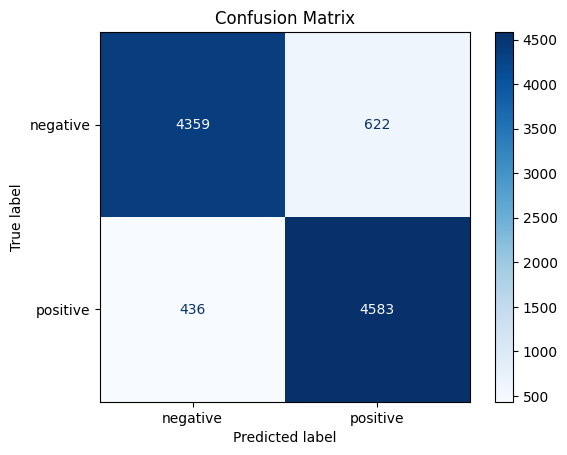

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
dis.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import xgboost as xgb
modeli = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
modeli.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
